<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-of-functions,-packages,-&amp;-data" data-toc-modified-id="Load-of-functions,-packages,-&amp;-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load of functions, packages, &amp; data</a></span></li><li><span><a href="#Overall-dataset-statistics-(all-banks)" data-toc-modified-id="Overall-dataset-statistics-(all-banks)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Overall dataset statistics (all banks)</a></span></li><li><span><a href="#Country-statistics" data-toc-modified-id="Country-statistics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Country statistics</a></span></li><li><span><a href="#Equal-weighted-and-value-weighted-statistics" data-toc-modified-id="Equal-weighted-and-value-weighted-statistics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Equal weighted and value weighted statistics</a></span></li></ul></div>

## Load of functions, packages, & data

In [1]:
"""
Function for geometric mean
"""
def geomean(data):
    
    n = data.shape[0]
    
    
    return (data+1).prod()**(1/n)-1

In [2]:
%load_ext autoreload
%autoreload 2

"""
Load relevant packages 
"""
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import pandas_datareader as pdr
import datetime
import seaborn as sns
import pickle
from scipy.stats import kurtosis
from scipy.stats import skew

from typing import Union, List

In [3]:
"""
Set path to get save data
"""
path = "/Users/julielaustsen/Desktop/OneDrive/UNI/Speciale /Data/Eikon"
os.chdir(path) 

In [4]:
"""
Load saved dataframes and dictionareis
"""
with open('df_mkt', 'rb') as data_market_df:
    df_mkt = pickle.load(data_market_df)
    
with open('df_rf', 'rb') as data_riskfree_df:
    df_rf = pickle.load(data_riskfree_df)

with open('data_calc', 'rb') as data_dict_calc:
    data_calc = pickle.load(data_dict_calc)  
    
with open('data_calc_win', 'rb') as data_dict_win:
    data_calc_win = pickle.load(data_dict_win) 
    
with open('dict_sort', 'rb') as data_sort_list:
    dict_sort = pickle.load(data_sort_list) 

In [5]:
"""
Dimension of our winsorized data
"""
dim_1 = data_calc_win[list(data_calc_win.keys())[0]].shape[0]
dim_2 = data_calc_win[list(data_calc_win.keys())[0]].shape[1]
dim_3 = len(data_calc_win.keys())

In [6]:
"""
To get the same columns names in each dataframe
"""
columns_list = ['Market Value', 'Return', 'Excess Return', 'Book Equity', 'Book Leverage ratio', 'Book Equity ratio', 'Book Equity/RWA', 'Tier 1 ratio','Tier 1/RWA','Total Assets','Total Risk Weighted Assets']

for i in data_calc_win.keys():
    data_calc_win[i].columns = columns_list
    
for i in data_calc.keys():
    data_calc[i].columns = columns_list

## Overall dataset statistics (all banks)

In [21]:
"""
Merged data with all banks
"""
print(len(dict_sort['all']))

ovall = pd.concat([data_calc_win[i] for i in dict_sort['all']]).groupby(level=0).mean()


226


In [8]:
"""
Descriptive statistics all data (ovall) - without outliers
"""

row_list = ['Excess Return', 'Market Value','Book Leverage ratio', 'Book Equity ratio', 'Tier 1 ratio']
descriptive1=pd.DataFrame(columns=['Observation','(Geometric) Mean', 'Median', 'Min', 'Max'])

for i in row_list:
    descriptive1.loc[i, '(Geometric) Mean'] = '{:,.03f}'.format(np.nanmean(ovall[i]))
    descriptive1.loc[i, 'Median'] = '{:,.03f}'.format(np.nanmedian(ovall[i]))
    descriptive1.loc[i, 'Min'] = '{:,.03f}'.format(np.nanmin(ovall[i]))
    descriptive1.loc[i, 'Max'] = '{:,.03f}'.format(np.nanmax(ovall[i]))
    descriptive1.loc[i, 'Observation'] = '{:,.0f}'.format(dim_1*dim_3-np.count_nonzero(np.isnan(np.array([data_calc_win[j][i] for j in data_calc_win.keys()]))),4)

#to get geometric mean
descriptive1.loc['Excess Return', '(Geometric) Mean'] = '{:,.03f}'.format(geomean(ovall.iloc[:,2]))

#Market excess return
descriptive1.loc['Market excess return','Observation'] = '{:,.0f}'.format(275-df_mkt['EUROPE IM (excess)'].isna().sum())
descriptive1.loc['Market excess return', '(Geometric) Mean']= '{:,.03f}'.format(geomean(df_mkt['EUROPE IM (excess)']))
descriptive1.loc['Market excess return', 'Median']= '{:,.03f}'.format(df_mkt['EUROPE IM (excess)'].median(skipna=True))
descriptive1.loc['Market excess return', 'Min']= '{:,.03f}'.format(df_mkt['EUROPE IM (excess)'].min(skipna=True))
descriptive1.loc['Market excess return', 'Max']= '{:,.03f}'.format(df_mkt['EUROPE IM (excess)'].max(skipna=True))

#risk free rate
descriptive1.loc['Risk-free rate','Observation'] = 276
descriptive1.loc['Risk-free rate', '(Geometric) Mean']= '{:,.03f}'.format(geomean(df_rf['euribor 1-month (Y)']))
descriptive1.loc['Risk-free rate', 'Median']= '{:,.03f}'.format(df_rf['euribor 1-month (Y)'].median(skipna=True))
descriptive1.loc['Risk-free rate', 'Min']= '{:,.03f}'.format(df_rf['euribor 1-month (Y)'].min(skipna=True))
descriptive1.loc['Risk-free rate', 'Max']= '{:,.03f}'.format(df_rf['euribor 1-month (Y)'].max(skipna=True))

descriptive1

,Observation,(Geometric) Mean,Median,Min,Max
Excess Return,"41,583",-0.009,0.004,-0.429,0.115
Market Value,"41,809","7,450.430","7,250.815","2,938.000","12,606.486"
Book Leverage ratio,"40,548",0.913,0.914,0.901,0.921
Book Equity ratio,"40,548",0.087,0.086,0.079,0.099
Tier 1 ratio,"32,956",0.070,0.070,0.059,0.077
Market excess return,275,0.001,0.009,-0.155,0.140
Risk-free rate,276,0.001,0.001,-0.000,0.004


## Country statistics

In [10]:
"""
Descriptive statistics Country -- just TYPE the country we want to see for
"""

row_list = ['Excess Return', 'Market Value','Book Leverage ratio', 'Book Equity ratio', 'Tier 1 ratio']
descriptive2=pd.DataFrame(columns=['Mean', 'Std excess return', '1%-quantile', 'IQR', '99%-quantile', 'Median', 'Min', 'Max'])


data = pd.concat([data_calc_win[i] for i in dict_sort['Denmark']]).groupby(level=0).mean() #set country here

for i in row_list:
    descriptive2.loc[i, 'Mean'] = round(np.nanmean(data[i]),4)
    descriptive2.loc[i, 'Std excess return'] = round(np.nanstd(data[i]),4)
    descriptive2.loc[i, '1%-quantile'] = round(np.nanquantile(data[i],0.01),4)
    descriptive2.loc[i, 'IQR'] = round(np.nanquantile(data[i],0.75)-np.nanquantile(data[i],0.25),4)
    descriptive2.loc[i, '99%-quantile'] = round(np.nanquantile(data[i],0.99),4)
    descriptive2.loc[i, 'Median'] = round(np.nanmedian(data[i]),4)
    descriptive2.loc[i, 'Min'] = round(np.nanmin(data[i]),4)
    descriptive2.loc[i, 'Max'] = round(np.nanmax(data[i]),4)

#to get geometric mean
descriptive2.loc['Excess Return', 'Mean'] = round(geomean(data.iloc[:,2]),4)
descriptive2

,Mean,Std excess return,1%-quantile,IQR,99%-quantile,Median,Min,Max
Excess Return,-0.0035,0.0546,-0.258,0.0426,0.0877,0.0054,-0.3482,0.1247
Market Value,964.6097,540.5626,247.3425,734.3338,2262.2826,799.2405,224.3278,2305.03
Book Leverage ratio,0.8886,0.007,0.8758,0.0099,0.9047,0.8877,0.8758,0.9047
Book Equity ratio,0.1114,0.007,0.0953,0.0099,0.1242,0.1123,0.0953,0.1242
Tier 1 ratio,0.1087,0.0122,0.0894,0.0175,0.1414,0.1065,0.0894,0.1414


In [11]:
"""
Country comparison - Excess Return
"""

descriptive3=pd.DataFrame(columns=['(Geometric) Mean', 'Std', '1%-quantile', 'IQR', '99%-quantile', 'Median', 'Min', 'Max'])

for i in dict_sort.keys():
    data = pd.concat([data_calc_win[i] for i in dict_sort[i]]).groupby(level=0).mean()
    
    descriptive3.loc[i, '(Geometric) Mean'] = round(geomean(data.iloc[:,2])*100,1)
    descriptive3.loc[i, 'Std'] = round(np.nanstd(data.iloc[:,2])*100,1)
    descriptive3.loc[i, '1%-quantile'] = round(np.nanquantile(data.iloc[:,2],0.01)*100,1)
    descriptive3.loc[i, 'IQR'] = round((np.nanquantile(data.iloc[:,2],0.75)-np.nanquantile(data.iloc[:,2],0.25))*100,1)
    descriptive3.loc[i, '99%-quantile'] = round(np.nanquantile(data.iloc[:,2],0.99)*100,1)
    descriptive3.loc[i, 'Median'] = round(np.nanmedian(data.iloc[:,2])*100,1)
    descriptive3.loc[i, 'Min'] = round(np.nanmin(data.iloc[:,2])*100,1)
    descriptive3.loc[i, 'Max'] = round(np.nanmax(data.iloc[:,2])*100,1)

descriptive3

,(Geometric) Mean,Std,1%-quantile,IQR,99%-quantile,Median,Min,Max
UK,-1.2,8.0,-31.3,6.3,13.3,0.3,-50.5,16.6
France,-0.8,6.9,-23.7,5.9,12.4,0.4,-53.1,19.1
Spain,-1.6,8.3,-24.2,7.4,14.7,-0.5,-62.6,24.7
Italy,-2.1,8.5,-32.2,7.9,13.5,-0.2,-41.9,18.4
Netherlands,-1.3,9.6,-35.4,9.1,15.3,0.7,-68.7,19.7
Germany,-0.9,5.6,-20.7,4.3,8.0,0.3,-38.7,9.7
Sweden,-0.3,7.5,-27.2,7.1,15.0,0.7,-47.1,23.1
Norway,-0.2,4.3,-11.0,4.3,7.0,0.4,-35.2,9.5
Belgium,-2.7,10.9,-40.8,7.7,18.9,-0.1,-72.5,29.7
Austria,-0.2,4.0,-12.7,3.8,6.9,0.2,-27.4,8.6


In [12]:
"""
Country comparison - Market Value
"""

descriptive4=pd.DataFrame(columns=['Mean', '1%-quantile', 'IQR', '99%-quantile', 'Median', 'Min', 'Max'])

for i in dict_sort.keys():
    data = pd.concat([data_calc_win[i] for i in dict_sort[i]]).groupby(level=0).mean()
    
    descriptive4.loc[i, 'Mean'] = round(np.nanmean(data.iloc[:,0]),4)
    descriptive4.loc[i, '1%-quantile'] = round(np.nanquantile(data.iloc[:,0],0.01),4)
    descriptive4.loc[i, 'IQR'] = round(np.nanquantile(data.iloc[:,0],0.75)-np.nanquantile(data.iloc[:,0],0.25),4)
    descriptive4.loc[i, '99%-quantile'] = round(np.nanquantile(data.iloc[:,0],0.99),4)
    descriptive4.loc[i, 'Median'] = round(np.nanmedian(data.iloc[:,0]),4)
    descriptive4.loc[i, 'Min'] = round(np.nanmin(data.iloc[:,0]),4)
    descriptive4.loc[i, 'Max'] = round(np.nanmax(data.iloc[:,0]),4)

descriptive4

,Mean,1%-quantile,IQR,99%-quantile,Median,Min,Max
UK,28101.7487,12907.1421,9663.1084,41999.4276,28516.3185,11067.5045,43734.4277
France,10414.8942,3740.3705,3515.8565,19809.3678,10236.5936,3415.915,21046.868
Spain,15153.8634,7311.7898,6920.3619,24241.5101,14818.9483,7008.5111,24543.6088
Italy,5194.2074,2574.7069,2017.5928,9659.2001,4874.4564,2174.0005,10368.2722
Netherlands,23298.5748,6360.895,15562.2958,47642.07,22198.2283,4159.21,48388.0967
Germany,4435.5128,1925.9313,1731.4192,8104.9771,4093.5723,1218.1531,8518.89
Sweden,13489.5679,5459.5338,7481.45,25034.7701,12983.5616,4050.9385,26226.1728
Norway,1013.9617,217.4065,818.1531,1928.0973,1063.9896,214.7751,2027.333
Belgium,8051.6385,1636.5531,4163.1292,17592.2494,7729.0188,1128.49,18500.6725
Austria,2529.0382,501.4788,1625.6559,5885.17,2507.814,430.495,6411.2933


In [14]:
"""
Country comparison - Book Equity ratio
"""

descriptive6=pd.DataFrame(columns=['Mean', 'Std', '1%-quantile', 'IQR', '99%-quantile', 'Median', 'Min', 'Max'])

for i in dict_sort.keys():
    data = pd.concat([data_calc_win[i] for i in dict_sort[i]]).groupby(level=0).mean()
    
    descriptive6.loc[i, 'Mean'] = round(np.nanmean(data.iloc[:,5])*100,1)
    descriptive6.loc[i, 'Std'] = round(np.nanstd(data.iloc[:,5])*100,1)
    descriptive6.loc[i, '1%-quantile'] = round(np.nanquantile(data.iloc[:,5],0.01)*100,1)
    descriptive6.loc[i, 'IQR'] = round((np.nanquantile(data.iloc[:,5],0.75)-np.nanquantile(data.iloc[:,5],0.25))*100,1)
    descriptive6.loc[i, '99%-quantile'] = round(np.nanquantile(data.iloc[:,5],0.99)*100,1)
    descriptive6.loc[i, 'Median'] = round(np.nanmedian(data.iloc[:,5])*100,1)
    descriptive6.loc[i, 'Min'] = round(np.nanmin(data.iloc[:,5])*100,1)
    descriptive6.loc[i, 'Max'] = round(np.nanmax(data.iloc[:,5])*100,1)

descriptive6

,Mean,Std,1%-quantile,IQR,99%-quantile,Median,Min,Max
UK,7.6,1.2,5.6,1.9,9.8,7.4,5.5,9.8
France,9.3,1.3,6.2,2.2,11.4,9.1,6.2,11.4
Spain,6.8,0.7,5.6,1.2,7.9,6.9,5.6,8.3
Italy,8.0,1.2,6.3,2.2,10.5,7.6,6.3,11.0
Netherlands,5.7,1.5,3.7,2.9,8.0,5.7,3.7,8.0
Germany,7.4,1.1,5.5,1.7,9.7,7.5,5.5,9.7
Sweden,5.6,2.3,3.8,2.1,15.3,5.4,3.8,15.3
Norway,8.8,1.6,6.4,2.4,11.8,8.4,6.4,12.3
Belgium,23.9,7.7,5.5,3.3,48.5,24.7,5.5,48.5
Austria,7.9,2.3,4.1,4.1,11.5,8.2,4.1,11.5


In [15]:
"""
Country comparison - Tier 1 ratio
"""

descriptive7=pd.DataFrame(columns=['Mean', 'Std', '1%-quantile', 'IQR', '99%-quantile', 'Median', 'Min', 'Max'])

for i in dict_sort.keys():
    data = pd.concat([data_calc_win[i] for i in dict_sort[i]]).groupby(level=0).mean()
    
    descriptive7.loc[i, 'Mean'] = round(np.nanmean(data.iloc[:,7])*100,1)
    descriptive7.loc[i, 'Std'] = round(np.nanstd(data.iloc[:,7])*100,1)
    descriptive7.loc[i, '1%-quantile'] = round(np.nanquantile(data.iloc[:,7],0.01)*100,1)
    descriptive7.loc[i, 'IQR'] = round((np.nanquantile(data.iloc[:,7],0.75)-np.nanquantile(data.iloc[:,7],0.25))*100,1)
    descriptive7.loc[i, '99%-quantile'] = round(np.nanquantile(data.iloc[:,7],0.99)*100,1)
    descriptive7.loc[i, 'Median'] = round(np.nanmedian(data.iloc[:,7])*100,1)
    descriptive7.loc[i, 'Min'] = round(np.nanmin(data.iloc[:,7])*100,1)
    descriptive7.loc[i, 'Max'] = round(np.nanmax(data.iloc[:,7])*100,1)

descriptive7

,Mean,Std,1%-quantile,IQR,99%-quantile,Median,Min,Max
UK,5.9,1.2,4.1,2.4,7.8,5.8,4.1,7.9
France,4.8,1.9,2.4,3.9,7.4,5.4,2.4,7.4
Spain,5.5,0.3,4.7,0.3,6.0,5.5,4.7,6.0
Italy,5.7,0.3,5.2,0.5,6.3,5.6,5.2,6.3
Netherlands,5.4,1.2,2.8,2.2,6.9,5.6,2.8,6.9
Germany,5.6,1.5,3.5,2.8,8.1,5.0,2.7,8.1
Sweden,4.1,0.8,3.0,0.7,6.0,3.9,3.0,6.0
Norway,8.3,0.9,6.6,1.6,10.1,8.1,6.6,10.1
Belgium,4.1,1.1,2.5,1.5,6.4,3.7,2.5,6.4
Austria,6.1,1.7,3.9,3.4,9.0,6.2,3.8,9.0


In [26]:
"""
Country comparison - Tier 1/RWA ratio
"""

descriptive7=pd.DataFrame(columns=['Mean', 'Std', '1%-quantile', 'IQR', '99%-quantile', 'Median', 'Min', 'Max'])

for i in dict_sort.keys():
    data = pd.concat([data_calc_win[i] for i in dict_sort[i]]).groupby(level=0).mean()
    
    descriptive7.loc[i, 'Mean'] = round(np.nanmean(data.iloc[:,8])*100,1)
    descriptive7.loc[i, 'Std'] = round(np.nanstd(data.iloc[:,8])*100,1)
    descriptive7.loc[i, '1%-quantile'] = round(np.nanquantile(data.iloc[:,8],0.01)*100,1)
    descriptive7.loc[i, 'IQR'] = round((np.nanquantile(data.iloc[:,8],0.75)-np.nanquantile(data.iloc[:,8],0.25))*100,1)
    descriptive7.loc[i, '99%-quantile'] = round(np.nanquantile(data.iloc[:,8],0.99)*100,1)
    descriptive7.loc[i, 'Median'] = round(np.nanmedian(data.iloc[:,8])*100,1)
    descriptive7.loc[i, 'Min'] = round(np.nanmin(data.iloc[:,8])*100,1)
    descriptive7.loc[i, 'Max'] = round(np.nanmax(data.iloc[:,8])*100,1)

descriptive7

,Mean,Std,1%-quantile,IQR,99%-quantile,Median,Min,Max
UK,12.6,3.1,7.8,6.8,18.8,13.7,7.8,18.8
France,13.3,7.0,7.1,8.0,38.9,11.7,7.1,38.9
Spain,10.4,2.7,7.2,5.7,15.2,9.4,7.1,15.2
Italy,10.8,4.0,5.3,6.7,19.8,9.7,5.3,19.8
Netherlands,12.5,4.3,7.0,5.9,21.3,12.2,7.0,21.3
Germany,10.7,3.2,6.3,5.9,15.7,10.6,6.3,15.7
Sweden,13.3,6.2,6.1,12.3,24.0,13.6,6.1,24.0
Norway,13.6,3.4,7.8,4.9,19.5,13.1,7.8,19.5
Belgium,13.6,4.5,8.8,8.1,21.9,11.1,8.8,21.9
Austria,10.1,2.9,6.7,5.7,14.2,10.4,6.7,14.2


## Equal weighted and value weighted statistics

In [16]:
"""
Value weighted portfolio (Market Value) - assigning weights
"""

#Calculate a aggregated dataset
agg = pd.concat([data_calc[i] for i in data_calc.keys()]).groupby(level=0).agg({lambda x: x.sum (skipna=True)})

#assigning weights to each bank based Market Value
for i in data_calc_win.keys():
    data_calc_win[i]['weight'] = data_calc_win[i].iloc[:,0]/agg.iloc[:,0]

#to check that the weight column sums to 1
pd.concat([data_calc_win[i] for i in data_calc_win.keys()]).groupby(level=0).sum()

,Market Value,Return,Excess Return,Book Equity,Book Leverage ratio,Book Equity ratio,Book Equity/RWA,Tier 1 ratio,Tier 1/RWA,Total Assets,Total Risk Weighted Assets,weight
Date,,,,,,,,,,,,
1999-01-24,6.953809e+05,0.000000,0.000000,6.449358e+08,123.048115,10.951888,1.478538,4.171132,1.211931,1.382518e+10,2.625926e+09,1.0
1999-02-24,7.469868e+05,2.786535,2.429605,6.449358e+08,123.048115,10.951888,1.478538,4.171132,1.211931,1.382518e+10,2.625926e+09,1.0
1999-03-24,7.414490e+05,-1.838851,-2.187607,6.449616e+08,123.991804,11.008199,1.478538,4.271523,1.211931,1.382564e+10,2.625926e+09,1.0
1999-04-24,8.252117e+05,3.915146,3.605255,6.454295e+08,123.998241,11.001762,1.487407,4.428998,1.211931,1.384198e+10,2.626564e+09,1.0
1999-05-24,8.105310e+05,-0.538586,-0.833688,6.454295e+08,123.998241,11.001762,1.487407,4.428998,1.211931,1.384198e+10,2.626564e+09,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24,9.352540e+05,2.896392,2.955669,2.647496e+09,66.252125,5.747875,3.313860,2.145035,2.843474,4.701090e+10,3.232456e+09,1.0
2021-09-24,9.498498e+05,0.404475,0.463487,2.647496e+09,66.252125,5.747875,3.313860,2.145035,2.843474,4.701090e+10,3.232456e+09,1.0
2021-10-24,1.023339e+06,5.144101,5.203410,2.647496e+09,66.252125,5.747875,3.313860,2.145035,2.843474,4.701090e+10,3.232456e+09,1.0


In [17]:
"""
Calculating weighted excess returns
"""

#calculating equal weight
eq_weight = 1 / len(data_calc_win.keys())

#adding two new variables that are weighted excess return
for i in data_calc_win.keys():
    data_calc_win[i]['VW_exret'] = data_calc_win[i]['Excess Return']*data_calc_win[i]['weight'] #value weighted excess return
    data_calc_win[i]['EW_exret'] = data_calc_win[i]['Excess Return']*eq_weight #equal weighted excess return

In [18]:
"""
Equal and value weighted describtive statistics
"""
#aggregating data to get equal and value weighted returns
aggcalc = pd.concat([data_calc_win[i] for i in data_calc_win.keys()]).groupby(level=0).agg({lambda x: x.sum (skipna=True)})

#storing the weighted excess returns
weight_excess_returns = pd.DataFrame()
weight_excess_returns['VW_exret']=aggcalc.iloc[:,-2]
weight_excess_returns['EW_exret']=aggcalc.iloc[:,-1]

data = weight_excess_returns
row_list = ['VW_exret', 'EW_exret']
descriptive8=pd.DataFrame(columns=['Mean', 'Std', '1%-quantile', 'IQR', '99%-quantile', 'Median', 'Min', 'Max', 'Skewness', 'Kurtosis'])

for i in row_list:
    descriptive8.loc[i, 'Mean'] = round(geomean(data[i]),4)
    descriptive8.loc[i, 'Std'] = round(np.nanstd(data[i]),4)
    descriptive8.loc[i, '1%-quantile'] = round(np.nanquantile(data[i],0.01),4)
    descriptive8.loc[i, 'IQR'] = round(np.nanquantile(data[i],0.75)-np.nanquantile(data[i],0.25),4)
    descriptive8.loc[i, '99%-quantile'] = round(np.nanquantile(data[i],0.99),4)
    descriptive8.loc[i, 'Median'] = round(np.nanmedian(data[i]),4)
    descriptive8.loc[i, 'Min'] = round(np.nanmin(data[i]),4)
    descriptive8.loc[i, 'Max'] = round(np.nanmax(data[i]),4)
    descriptive8.loc[i, 'Skewness'] = round(skew(data[i]),4)
    descriptive8.loc[i, 'Kurtosis'] = round(kurtosis(data[i]),4)
    
descriptive8

,Mean,Std,1%-quantile,IQR,99%-quantile,Median,Min,Max,Skewness,Kurtosis
VW_exret,-0.0099,0.0808,-0.3099,0.0738,0.1387,0.0022,-0.4638,0.1945,-1.8107,7.0543
EW_exret,-0.0057,0.0361,-0.1201,0.0294,0.0591,0.0025,-0.2641,0.0705,-2.6388,13.4342


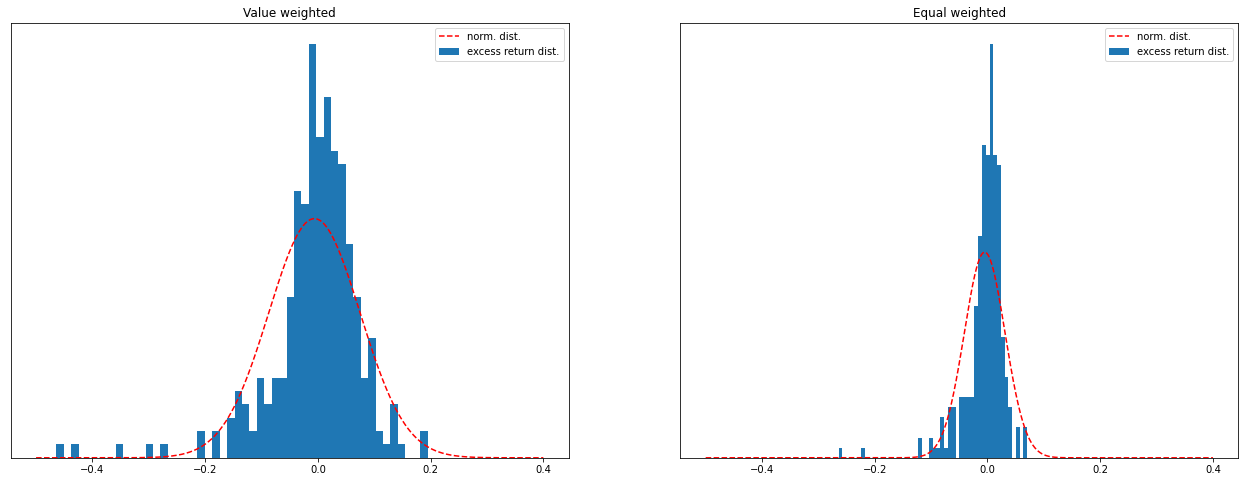

In [19]:
"""
Excess return value and equal weighted compared with a normal distribution
"""

x_values = np.linspace(-0.5, 0.4, 10000)
plot_names = ['Value weighted', 'Equal weighted']
fig, ax = plt.subplots(1, 2, figsize=(22, 8))
ax = ax.flatten()


for i in range(2): 
    mu = np.average(data.iloc[:,i])
    sigma = weight_excess_returns.iloc[:,i].std()
    pdf_values = stats.norm.pdf(x_values, loc=mu, scale=sigma)
    ax[i].plot(x_values, pdf_values, linestyle="--", color='red', label="norm. dist.");
    ax[i].hist(weight_excess_returns.iloc[:,i], bins=50, density=True, label="excess return dist.")
    ax[i].set_title(plot_names[i])
    ax[i].get_yaxis().set_visible(False)
    ax[i].legend();
    
fig.subplots_adjust(hspace=0.2)

(-0.5, 0.2)

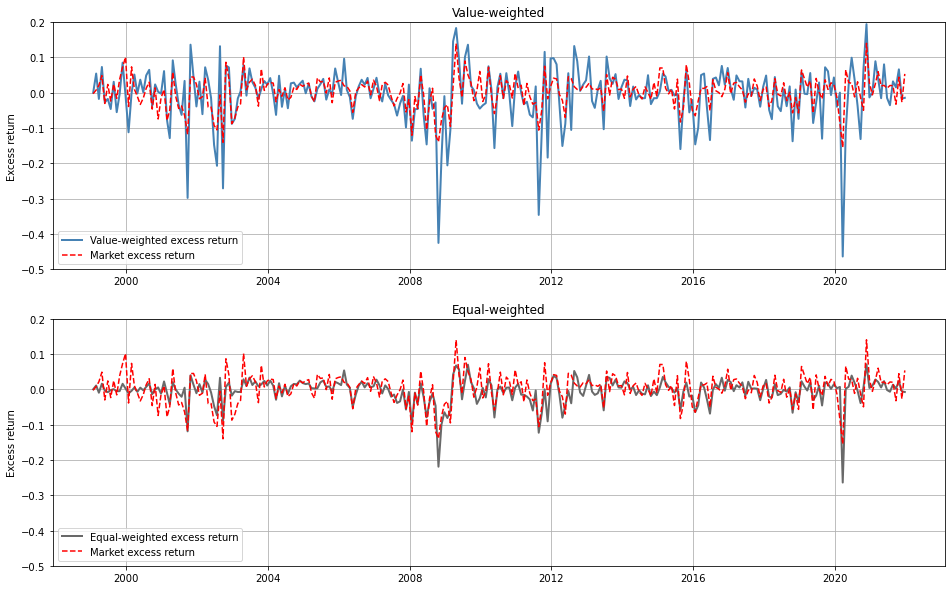

In [20]:
"""
Excess return value and equal weighted distribution compared to market excess return
"""

fig, ax = plt.subplots(2, 1,figsize=(16,10))


ax[0].plot(weight_excess_returns.index, weight_excess_returns['VW_exret'], color='steelblue', label='Value-weighted excess return', linewidth=2)
ax[0].plot(df_mkt.index, df_mkt['EUROPE IM (excess)'], color='red', label='Market excess return', linestyle='--')   
ax[0].grid(True);
ax[0].legend()
ax[0].set_title('Value-weighted')
ax[0].set_ylabel('Excess return')
ax[0].set_ylim([-0.5,0.2])
    
ax[1].plot(weight_excess_returns.index, weight_excess_returns['EW_exret'], color='dimgrey', label='Equal-weighted excess return', linewidth=2)
ax[1].plot(df_mkt.index, df_mkt['EUROPE IM (excess)'], color='red', label='Market excess return', linestyle='--')   
ax[1].grid(True);
ax[1].legend()
ax[1].set_title('Equal-weighted')
ax[1].set_ylabel('Excess return')
ax[1].set_ylim([-0.5,0.2])
    